### In this we are going to classifiy if the given news is fake or real

Fake news classifier is widly used for many reasons and it is quite easy to implement as well

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import nltk

In [2]:
data=pd.read_csv('Fake news Classifier/train.csv',index_col='id')

In [3]:
data.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [4]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
x

,title,author,text
id,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...


In [6]:
x.isnull().sum()

title      558
author    1957
text        39
dtype: int64

In [7]:
x=data.dropna()

In [8]:
x.shape

(18285, 4)

##### Now we will do a bit of text preprossesing like stem or lemitize maybe remove the unwanted words as well...this is done so that we get a good fit

In [25]:
messages=x.copy()

In [26]:
messages.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0


In [27]:
messages.reset_index(inplace=True)

In [28]:
messages

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import regex as re

In [30]:
lemitize=WordNetLemmatizer()

In [31]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemitize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

##### Here we are 
1. Eliminating all the stuff which isn't a word or doesnt come under a-z
2. Lowering will help us because Before and before are treated differently and if because of one Before it can get missclassified
3. Split so that we use lemmatization
    1. Use lemmatization
    2. Use stopwords to eliminate all the unneccesary words like helping words,verbs and articles 
4. Finally append to corpus

In [35]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))#this tell the algo how to use the tfidf how to use the corpus eg we have 'I am boy' ngram=1,2 then 'i am' and 'am boy' will be created
x=cv.fit_transform(corpus).toarray()

In [33]:
y=messages.label

In [34]:
###Divide the x into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [36]:
cv.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [37]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
classifier=MultinomialNB()

The accuracy is 0.898


<AxesSubplot:>

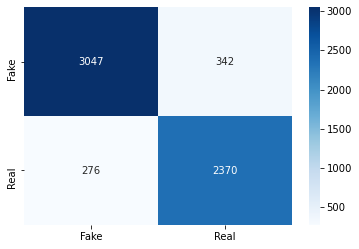

In [40]:
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('The accuracy is %0.3f' %score)
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,cmap='Blues',annot=True,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'],fmt='d')

#### Here we have used the MultinomialNB and we have got a good fit,can do better

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier

The accuracy is 0.918


<AxesSubplot:>

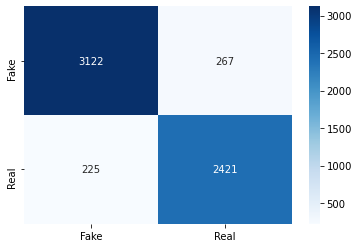

In [46]:
clf_pac=PassiveAggressiveClassifier()
clf_pac.fit(x_train,y_train)
y_pred=clf_pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('The accuracy is %0.3f' %score)
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,cmap='Blues',annot=True,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'],fmt='d')

### Lets do some hyper param tunning for Multinomial NB

In [47]:
params={
    'alpha':(np.arange(0,1,0.1))
}#alpha value is using the laplace technique
#what is laplace tech?
#Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm.

In [48]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
grid_mulnb=GridSearchCV(classifier,param_grid=params,n_jobs=-1,verbose=3,cv=7)
grid_mulnb.fit(x_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


GridSearchCV(cv=7, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             verbose=3)

In [49]:
grid_mulnb.best_params_

{'alpha': 0.8}

In [50]:
grid_mulnb.best_score_

0.8970612244897959

In [51]:
random_mulnb=RandomizedSearchCV(classifier,params,n_jobs=-1,cv=7,verbose=3)
random_mulnb.fit(x_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   verbose=3)

In [52]:
random_mulnb.best_params_

{'alpha': 0.8}

In [53]:
random_mulnb.best_score_

0.8970612244897959

#### We have got a fair result from the hyper param tunning but we cannot exceed beyond the 89% marks so even with MultinomialNB we will get nearly upto 90%